# Feature Scaling - Standardization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"Social_Network_Ads.csv")

In [6]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
13,15704987,Male,32,18000,0
273,15589449,Male,39,106000,1
341,15776844,Male,35,75000,0
0,15624510,Male,19,19000,0
384,15806901,Female,57,33000,1


In [8]:
#df=df[:,2:]
df=df.drop(columns=["User ID","Gender"])

In [9]:
df.sample(5)

,Age,EstimatedSalary,Purchased
268,47,144000,1
172,26,118000,0
4,19,76000,0
384,57,33000,1
145,24,89000,0


In [10]:
x=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

In [11]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [16]:
X_train.shape

(280, 2)

In [17]:
X_test.shape

(120, 2)

In [ ]:
# Advance


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

## StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train.head()

,Age,EstimatedSalary
94,29,83000
255,52,90000
359,42,54000
393,60,42000
252,48,134000


In [21]:
X_train_scaled

array([[-0.88238913,  0.41471671],
       [ 1.35573059,  0.62678161],
       [ 0.38263506, -0.46383786],
       [ 2.13420702, -0.82737769],
       [ 0.96649238,  1.95976096],
       [-0.29853181, -1.28180247],
       [ 0.38263506,  1.0509114 ],
       [ 1.93958791,  2.26271081],
       [ 0.77187328,  0.56619164],
       [-0.1039127 ,  2.32330078],
       [ 1.64765925,  1.83858102],
       [ 1.84227836, -0.28206795],
       [ 1.45304015,  2.23241583],
       [-1.27162734,  0.32383175],
       [ 1.25842104, -1.40298241],
       [-0.68777002, -1.06973757],
       [-0.29853181, -1.34239244],
       [ 0.0907064 , -0.82737769],
       [-1.17431778, -1.13032754],
       [ 0.47994462,  1.80828603],
       [-0.97969868,  0.29353677],
       [ 0.77187328, -1.25150748],
       [ 0.67456372, -1.43327739],
       [-1.17431778, -0.7970827 ],
       [-0.20122225,  0.17235683],
       [ 0.86918283, -0.61531279],
       [ 0.67456372,  1.868876  ],
       [ 0.77187328, -1.40298241],
       [ 1.25842104,

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [23]:
X_train_scaled.head(5)

,Age,EstimatedSalary
0,-0.882389,0.414717
1,1.355731,0.626782
2,0.382635,-0.463838
3,2.134207,-0.827378
4,0.966492,1.959761


In [24]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()

In [26]:
clf.fit(X_train_scaled,y_train)

LogisticRegression()

In [27]:
# evaluate model

clf.predict(X_test_scaled)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [28]:
# check accuracy

y_pred=clf.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8166666666666667

In [30]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,38.1,69310.7
std,10.3,33067.9
min,18.0,15000.0
25%,30.8,43000.0
50%,37.0,71000.0
75%,46.0,86250.0
max,60.0,150000.0


In [31]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.7,-0.8
50%,-0.1,0.1
75%,0.8,0.5
max,2.1,2.4


## Effect of Scaling

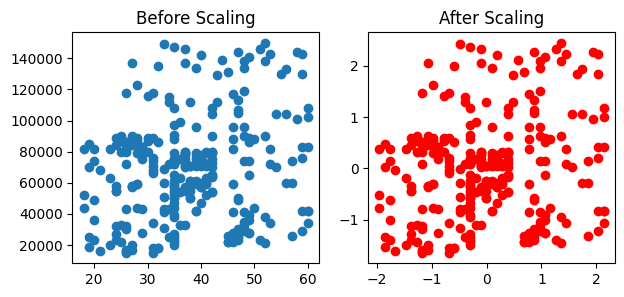

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

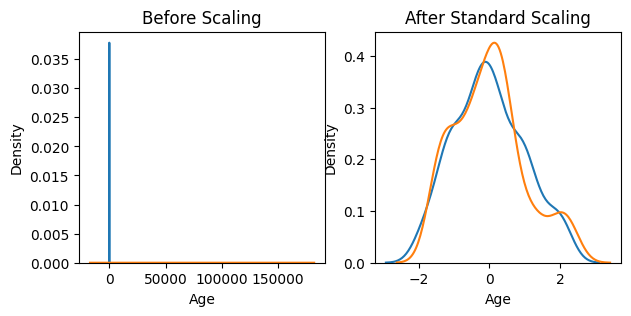

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparison of Distributions

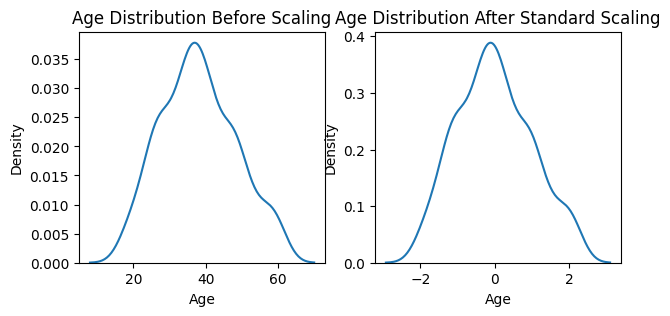

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

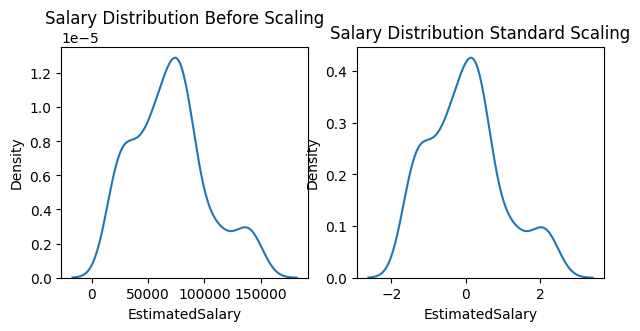

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Why scaling is important?

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [45]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.825
Scaled 0.8166666666666667


In [49]:
from sklearn.tree import DecisionTreeClassifier


# does affect by scaling in decision tree

In [50]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [51]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [52]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [53]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


# scaling Normalization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv(r"wine_data.csv")

In [14]:
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [16]:
df=data[["1","14.23","1.71"]]
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [18]:
df.sample(5)

,Class label,Alcohol,Malic acid
3,1,13.24,2.59
37,1,13.07,1.50
28,1,14.02,1.68
139,3,12.93,2.81
42,1,13.24,3.98


<Axes: xlabel='Alcohol', ylabel='Density'>

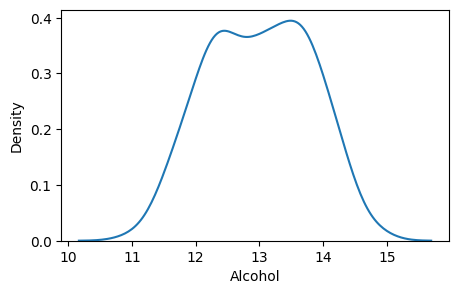

In [19]:
plt.figure(figsize=(5, 3))

sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

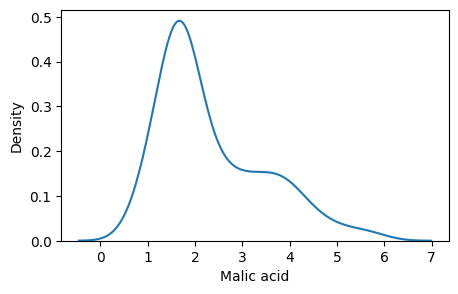

In [21]:
plt.figure(figsize=(5, 3))

sns.kdeplot(df["Malic acid"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

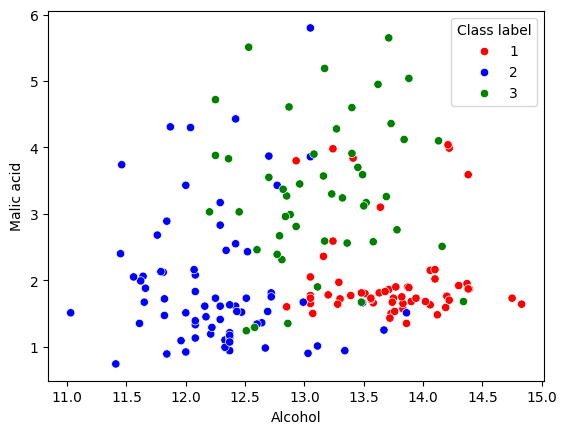

In [25]:
color_dict={1:'red',3:'green',2:'blue'}

sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', data=df,palette=color_dict)

In [28]:
x=df[["Alcohol","Malic acid"]]
y=df["Class label"]

In [29]:
x

,Alcohol,Malic acid
0,13.20,1.78
1,13.16,2.36
2,14.37,1.95
3,13.24,2.59
4,14.20,1.76
...,...,...
172,13.71,5.65
173,13.40,3.91
174,13.27,4.28
175,13.17,2.59


In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [31]:
x_train.shape

(159, 2)

In [32]:
x_test.shape

(18, 2)

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [37]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [40]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [42]:
x_train_scaled.head()

,Alcohol,Malic acid
0,0.255263,0.035573
1,0.500000,0.604743
2,0.571053,0.205534
3,0.476316,0.438735
4,0.560526,0.320158


In [43]:
x_test_scaled.head()

,Alcohol,Malic acid
0,0.723684,0.399209
1,0.331579,0.480237
2,0.200000,0.274704
3,0.710526,0.150198
4,0.478947,0.169960


In [44]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,159.0,159.0
mean,13.0,2.4
std,0.8,1.2
min,11.0,0.7
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.8


In [46]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,159.0,159.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [61]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
clf1=LogisticRegression()

clf.fit(x_train_scaled,y_train)
clf1.fit(x_train,y_train)

LogisticRegression()

In [63]:
clf.predict(x_test_scaled)

array([1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2], dtype=int64)

In [66]:
clf1.predict(x_test)

array([1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2], dtype=int64)

In [51]:
y_test

163    3
98     2
126    2
29     1
22     1
5      1
53     1
52     1
34     1
134    3
76     2
137    3
104    2
120    2
8      1
64     2
153    3
102    2
Name: Class label, dtype: int64

In [67]:
from sklearn.metrics import accuracy_score

y_pred=clf.predict(x_test_scaled)
y_pre_before=clf1.predict(x_test)

print("Score Before Scaling",accuracy_score(y_test,y_pre_before))
print("Score After Scaling",accuracy_score(y_test,y_pred))

Score Before Scaling 0.7777777777777778
Score After Scaling 0.7777777777777778


In [70]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier()
dt1=DecisionTreeClassifier()

dt.fit(x_train_scaled,y_train)
dt1.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
dt_pred=dt.predict(x_test_scaled)
dt_pred_before=dt.predict(x_test)

In [75]:
print("Score Level")

from sklearn.metrics import accuracy_score


dt_pred=dt.predict(x_test_scaled)
dt_pred_before=dt.predict(x_test)

print("Score Before Scaling",accuracy_score(y_test,dt_pred_before))
print("Score After Scaling",accuracy_score(y_test,dt_pred))

Score Level
Score Before Scaling 0.3888888888888889
Score After Scaling 0.6666666666666666


Text(0.5, 1.0, 'After Scaling')

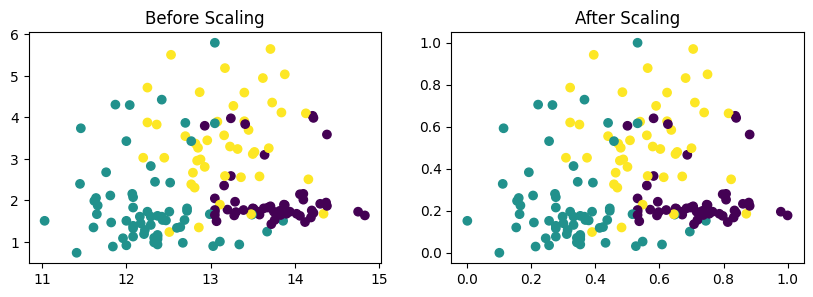

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

ax1.scatter(x_train["Alcohol"],x_train["Malic acid"],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic acid"],c=y_train)
ax2.set_title("After Scaling")

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

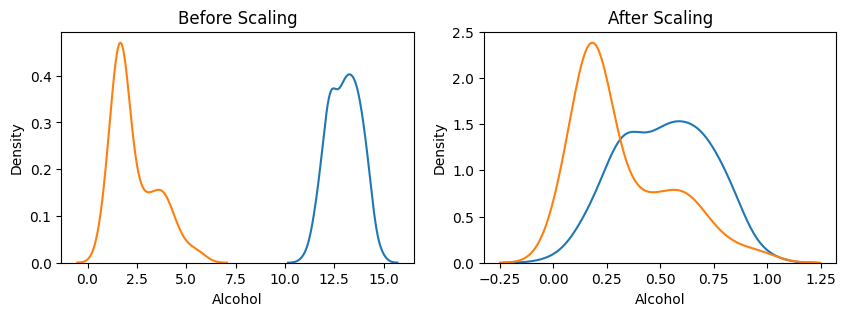

In [87]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,3))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Alcohol"] ,ax=ax1)
sns.kdeplot(x_train["Malic acid"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(x_train_scaled["Malic acid"],ax=ax2)